In [23]:
import pandas as pd
import numpy as np
import streamlit as st
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

# 1. Data Preprocessing


In [24]:
df = pd.read_csv('finaldata.csv')

In [25]:
df.sample(10)

,labels,text
966,ham,या बेहतर अभी भी आप उसे पकड़ सकते हैं और उससे प...
4317,ham,"मैं बात नहीं कर सकता, sczel होल समस्या है. मैं..."
2924,ham,ठीक है बस बैठे हैं.
3271,ham,के वास्तव में तुम लोग मुझे कैसे माथे पर सूरजोक...
3562,spam,यह देखने के लिए पाठ BanvU5K का उल्लंघन किया गया!
2034,ham,IM जाने वाला MISSU इतनी मात्रा में
3918,ham,यूर लैपटॉप के पास लकड़ी नहीं था... वह कहता है ...
3891,spam,डबल मिक्स्स (१) ब्लॉफ्स पर डबल मिम्पो. नवीनतम ...
3585,spam,HXATACAT के लिए नया NTAT: 11551 प्राप्त करने क...
422,spam,किसी ने हमारी डेटिंग सेवा से संपर्क किया है और...


In [26]:
df.shape

(5572, 2)

In [27]:
df.info

<bound method DataFrame.info of      labels                                               text
0       ham  Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...
1       ham                         ओके लामर.... if if uue पर.
2      spam  Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...
3       ham  Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...
4       ham  नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...
...     ...                                                ...
5567   spam  यह 2 सेकंड है जब हमने 2 संपर्क की कोशिश की है....
5568    ham      क्या कलाई घर का पता लगाने के लिए जा रही होगी?
5569    ham                      तो फिर, दूसरे सुझाव क्या हैं?
5570    ham  आदमी कुछ कुतियािंग किया लेकिन मैं मैं कुछ और ख...
5571    ham                     उसकी पीठ के नाम पर इसकी सच्चाई

[5572 rows x 2 columns]>

<function matplotlib.pyplot.show(close=None, block=None)>

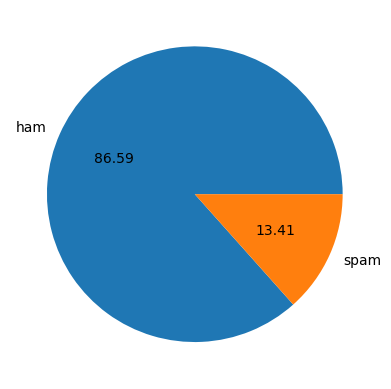

In [28]:
#plotting
plt.pie(df['labels'].value_counts(), labels = ['ham', 'spam'], autopct="%0.2f")
plt.show

In [29]:
# Split the dataset into input (SMS messages) and target (spam or not)

texts = df['text'].astype(str).values
labels = df['labels'].map({'ham': 0, 'spam': 1}).values
print('Texts:',texts)
print('Labels:',labels)

Texts: ['Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान विश्व cag में उपलब्ध है... वहाँ एक अधिक wack मिला...'
 'ओके लामर.... if if uue पर.'
 'Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प्रविष्टि में. पाठ FAO को 87121 में प्रविष्टि प्राप्त करने के लिए(stibook दर) TTVERVE है 0. 08375750818 के मूल्य लागू करता है'
 ... 'तो फिर, दूसरे सुझाव क्या हैं?'
 'आदमी कुछ कुतियािंग किया लेकिन मैं मैं कुछ और खरीदने में दिलचस्पी की तरह काम किया और वह हमें मुक्त करने के लिए दे दिया'
 'उसकी पीठ के नाम पर इसकी सच्चाई']
Labels: [0 0 1 ... 0 0 0]


In [30]:
#Tokenization and Padding
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, padding='post')


In [32]:
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
max_length = padded_sequences.shape[1]
with open('max_length.pkl', 'wb') as f:
    pickle.dump(max_length, f)

# 2. Model 


In [10]:
model = Sequential()
model.add(Embedding(max_words, 32, input_length = padded_sequences.shape[1]))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation ='sigmoid'))

In [11]:
#model compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
#Train_test_split
train_size = int(0.8 * len(padded_sequences))
train_texts = padded_sequences[:train_size]
train_labels = labels[:train_size]
test_texts = padded_sequences[train_size:]
test_labels = labels[train_size:]

In [13]:
#Training the model
epochs = 10 
batch_size = 32
history = model.fit(train_texts, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_texts, test_labels))

Epoch 1/10


2023-07-05 13:50:06.394626: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


140/140 [==============================] - 13s 88ms/step - loss: 0.3183 - accuracy: 0.8928 - val_loss: 0.1256 - val_accuracy: 0.9525
Epoch 2/10
140/140 [==============================] - 12s 85ms/step - loss: 0.1237 - accuracy: 0.9637 - val_loss: 0.1025 - val_accuracy: 0.9668
Epoch 3/10
140/140 [==============================] - 12s 86ms/step - loss: 0.0789 - accuracy: 0.9778 - val_loss: 0.0893 - val_accuracy: 0.9704
Epoch 4/10
140/140 [==============================] - 12s 85ms/step - loss: 0.0588 - accuracy: 0.9829 - val_loss: 0.0916 - val_accuracy: 0.9722
Epoch 5/10
140/140 [==============================] - 13s 90ms/step - loss: 0.0607 - accuracy: 0.9861 - val_loss: 0.1163 - val_accuracy: 0.9614
Epoch 6/10
140/140 [==============================] - 12s 84ms/step - loss: 0.0482 - accuracy: 0.9865 - val_loss: 0.1041 - val_accuracy: 0.9740
Epoch 7/10
140/140 [==============================] - 12s 85ms/step - loss: 0.0492 - accuracy: 0.9863 - val_loss: 0.1137 - val_accuracy: 0.9650
Epo

In [14]:
filename = "model1.h5"
model.save(filename)

# 3. Evaluating the Model

In [15]:
loss, accuracy = model.evaluate(test_texts, test_labels)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

35/35 [==============================] - 1s 20ms/step - loss: 0.1353 - accuracy: 0.9659
Test Loss: 0.13532760739326477
Test Accuracy: 0.9659192562103271


In [16]:
# tf.keras.models.save_model(model, 'hindi_model.h5')

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

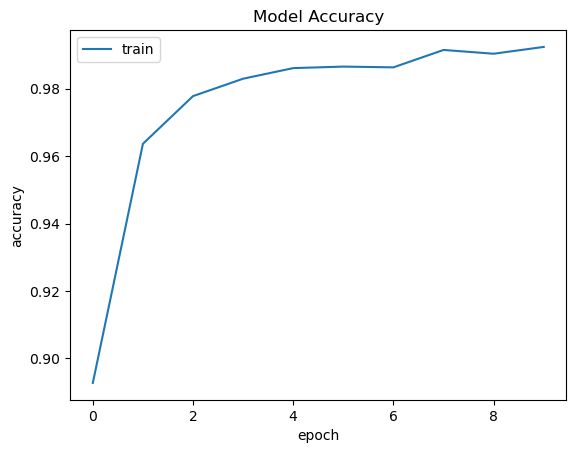

In [18]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

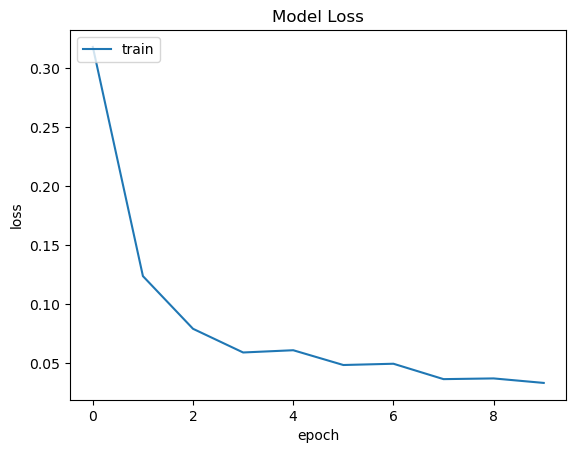

In [19]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

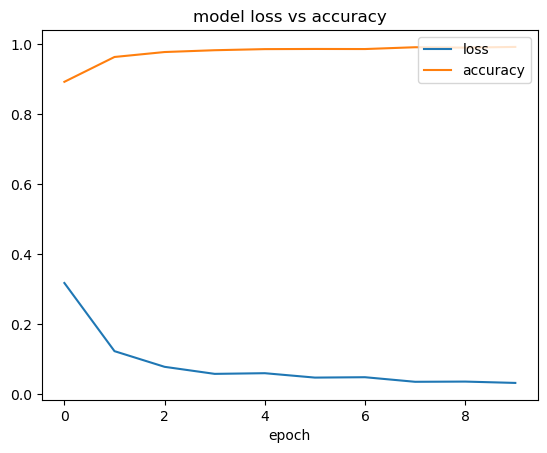

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show() 

In [21]:
# Take user input
user_input = input("Enter a message: ")

# Preprocess the user input
user_sequence = tokenizer.texts_to_sequences([user_input])
user_padded_sequence = pad_sequences(user_sequence, padding='post', maxlen=padded_sequences.shape[1])

# Make prediction on user input
prediction = model.predict(user_padded_sequence)

# Interpret the prediction
if prediction >= 0.5:
    print("The message is predicted as spam.")
else:
    print("The message is predicted as not spam.")


Enter a message: एयरटेल स्पेशल डेटा पैक। आज ही रिचार्ज करे रु 29 से और आनंद ले अपने पसंदीदा टीवी शोज, मूवीज और लाइव स्पोर्ट एक्शन्स। रु 29 के रिचार्ज में आपको मिलता है 2 GB डाटा 1 दिन की वैलिडिटी के साथ। नजदीकी रिटेलर पर जाएँ या अपने मनपसंद ऑनलाइन माध्यम से आज ही रीचार्ज करें।
1/1 [==============================] - 0s 314ms/step
The message is predicted as spam.


In [22]:


# # Load and preprocess the real-world data
# real_data = pd.read_csv('realdata.csv')
# real_texts = real_data['text'].astype(str).values
# real_sequences = tokenizer.texts_to_sequences(real_texts)
# real_padded_sequences = pad_sequences(real_sequences, padding='post')

# # Make predictions on the real-world data
# predictions = model.predict(real_padded_sequences)

# # Interpret the predictions
# for i, prediction in enumerate(predictions):
#     if prediction >= 0.5:
#         print(f"Message '{i}' is predicted as spam.")
#     else:
#         print(f"Message '{i}' is predicted as not spam.")
